In [1]:
# Estrategias de Evolución

In [2]:
import random
import numpy as np
import math

In [3]:
#------------Funciones------------
# Función de Rosenbrock (Fitness)
def fun_obj(x1, x2):
    return 100 * (x1 **2 - x2) **2 + (1 - x1) **2


In [5]:
# Función para inciar un individuo
def inciar_individuo(Imin, Imax):
    x1 = random.uniform(Imin, Imax)
    x2 = random.uniform(Imin, Imax)

    sigma1 = random.uniform(0.1, 1.0) # Estrategia incial descrita en la literatura
    sigma2 = random.uniform(0.1, 1.0)

    return [x1, x2, sigma1, sigma2]

In [6]:
# Mutación autoadaptativa
def  mutacion(individuo, Imin, Imax):
    n = 2 # Dimensiones
    tau = 1/math.sqrt(2*math.sqrt(n))
    tau_prima = 1/math.sqrt(2*n)

    # Ruido global y local para la mutación
    N0 = random.gauss(0,1) # Ruido de acuerdo a la formula dada la explicación
    individuo[2] *= math.exp(tau_prima * N0 + tau * random.gauss(0,1))
    individuo[3] *= math.exp(tau_prima * N0 + tau * random.gauss(0,1))

    # Mutacion en variables de decisión 
    individuo[0] += individuo[2] * random.gauss(0,1)
    individuo[1] += individuo[3] * random.gauss(0,1)

    # Restricción de los valores dentro del rango, si se salen se colocan en 
    # el límite para que los nuevos individuos no se salgan del rango
    if individuo[0] < Imin:
        individuo[0] = Imin
    if individuo[0] > Imax:
        individuo[0] = Imax
    if individuo[1] < Imin:
        individuo[1] = Imin
    if individuo[1] > Imax:
        individuo[1] = Imax
        
    # El cual es el individuo mutado en formato de [x1, x2, sigma1, sigma2]
    return individuo


In [ ]:
# Seleccion por (mu + lambda)
def seleccion_mu_mas_lambda(padres, hijos, mu):
    # Unión de padres e hijos
    incesto = padres + hijos

    # Ordenar la unión por el valor de fitness (menor es mejor)
    incesto.sort(key=lambda ind: fun_obj(ind[0], ind[1]))

    # Seleccionar los mejores mu individuos
    seleccionados = incesto[:mu]

    # El otro metodo es (mu, lambda):
    # poblacion = 


    return seleccionados


In [ ]:
#-----------Algritmo Principal-----------
Imin = -50
Imax = 50
mu = 50
lambd = 200
generaciones = 1000

# Se crean la población incial 
P = []
for i in range(mu):
    P.append(inciar_individuo(Imin, Imax))

# Evolución por generaciones
for g in range(generaciones):
    offspring = []
    for i in range(lambd):
        # Selección aleatoria de un padre
        padre = random.choice(P)
        # Mutación del padre para crear un hijo
        hijo = padre[:]

        hijo_mutado = mutacion(hijo, Imin, Imax)
        offspring.append(hijo_mutado)

    # Seleccion de los mejores mu individuos entre padres e hijos
    P = seleccion_mu_mas_lambda(padres=P, hijos=offspring, mu=mu)
    mejor = P[0] 


# Resultados
print("Algoritmo de Estrategias de Evolución  (μ, λ)-ES")
print("Mejor individuo: ", mejor)
print("Valor de la función objetivo: ", fun_obj(mejor[0], mejor[1]))


Algoritmo de Estrategias de Evolución  (μ, λ)-ES
Mejor individuo:  [1.0, 1.0, 7.080182277244327e-16, 4.589276931919934e-16]
Valor de la función objetivo:  0.0


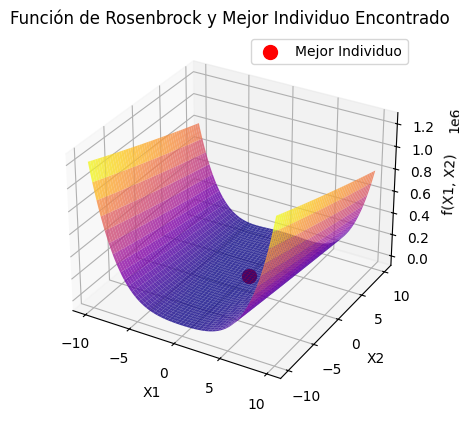

In [29]:
# Grafica de la función objetivo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = fun_obj(X, Y)
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)
ax.scatter(mejor[0], mejor[1], fun_obj(mejor[0], mejor[1]), color='r', s=100, label='Mejor Individuo')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Función de Rosenbrock y Mejor Individuo Encontrado')
ax.legend()
plt.show()